
## Logistic Regression without Sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
data = load_breast_cancer()
data_features = data.data
data_target = data.target
data_table = pd.DataFrame(data=data_features, columns=data.feature_names)
data_table = data_table.join(pd.Series(data_target, name='Result'))

In [14]:
data_table.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
data_features.shape

(569, 30)

In [ ]:
pd.notna(data_table).all()

In [19]:
data_table.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [21]:
data_mean = data_table.mean()[0:30].to_numpy()
data_diff = (data_table.max() - data_table.min())[0:30].to_numpy()

In [23]:
data_scaled = (data_features - data_mean)/data_diff

In [26]:
data_scaled.mean()

-1.0031681272301356e-16

In [30]:
data_scaled.shape

(569, 30)

In [34]:
X0 = np.ones([569,1])
data_scaled_X0 = np.concatenate((X0, data_scaled), axis=1) 
data_scaled_X0[0]

array([ 1.        ,  0.18281548, -0.30130702,  0.21305346,  0.14681268,
        0.1989683 ,  0.53143677,  0.49508127,  0.48797641,  0.30675827,
        0.3351388 ,  0.2498019 , -0.06885463,  0.26965748,  0.21117546,
       -0.0218234 ,  0.17695993,  0.05514213,  0.07717111,  0.13350173,
        0.08284953,  0.32411278, -0.22247397,  0.38517251,  0.2797918 ,
        0.19699799,  0.39907923,  0.35120728,  0.51819167,  0.33515559,
        0.22926789])

In [37]:
Theta = np.zeros([31])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled_X0, data_target, test_size=0.3, random_state=0)

In [44]:
z_theta = np.sum(X_train*Theta, axis=1)
z_theta.shape

(398,)

In [90]:
def sigmoid(z):
  h_theta = 1/(1+(np.e**(-z)))
  return h_theta

In [91]:
#(0.01/len(Cost_func))*np.sum((h_theta - y_train)*X_train.transpose(), axis=1)

In [96]:
Theta = np.zeros([31])

#Just setting a high J number so the while loop can start

J=10
J_list = []
i = 0

while J>0.1 and i<10000:
  z_theta = np.sum(X_train*Theta, axis=1)
  h_theta = sigmoid(z_theta)
  Cost_func = -y_train*np.log(h_theta) - (1-y_train)*np.log(1 - h_theta)

  J = (1/len(Cost_func))*np.sum(Cost_func)
  J_list.append(J)

  Theta_temp = (0.09/len(Cost_func))*np.sum((h_theta - y_train)*X_train.transpose(), axis=1)
  Theta = Theta - Theta_temp
  i = i+1

print(J, i)

0.09999862017213565 6825


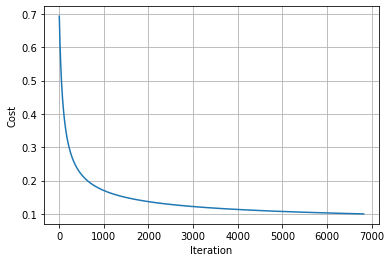

In [101]:
plt.plot(range(len(J_list)), J_list);
plt.grid();
plt.ylabel('Cost')
plt.xlabel('Iteration');

In [119]:
def verify(probability):
  prediction = []
  for i in probability:
    if i > 0.5:
      predict = 1
      prediction.append(predict)
    else:
      predict = 0
      prediction.append(predict)
  return prediction
  
z_test = np.sum(X_test*Theta, axis=1)
h_test = sigmoid(z_test)
h_test = h_test.tolist()

prediction = verify(h_test)

In [123]:
comparative = np.concatenate((np.array([prediction]).transpose(), np.array([y_test]).transpose()), axis=1)


In [139]:
True_Positives = comparative[(comparative[:,1] == 1) & (comparative[:,0] == 1)].shape[0]
False_Positives = comparative[(comparative[:,1] == 0) & (comparative[:,0] == 1)].shape[0]
True_Negatives = comparative[(comparative[:,1] == 0) & (comparative[:,0] == 0)].shape[0]
False_Negatives = comparative[(comparative[:,1] == 1) & (comparative[:,0] == 0)].shape[0]

In [141]:
Precision = True_Positives/(True_Positives+False_Positives)
Recall = True_Positives/(True_Positives+False_Negatives)

F1Score = 2*(Precision*Recall)/(Precision+Recall)
F1Score

0.9769585253456222

## Logistic Regression with SKLearn

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model = LogisticRegression()

In [145]:
model.fit(X_train, y_train);

In [ ]:
model.predict(X_test)

In [ ]:
y_test

In [146]:
model.score(X_test, y_test)

0.9532163742690059

In [149]:
comparative = np.concatenate((np.array([model.predict(X_test)]).transpose(), np.array([y_test]).transpose()), axis=1)
True_Positives_sk = comparative[(comparative[:,1] == 1) & (comparative[:,0] == 1)].shape[0]
False_Positives_sk = comparative[(comparative[:,1] == 0) & (comparative[:,0] == 1)].shape[0]
True_Negatives_sk = comparative[(comparative[:,1] == 0) & (comparative[:,0] == 0)].shape[0]
False_Negatives_sk = comparative[(comparative[:,1] == 1) & (comparative[:,0] == 0)].shape[0]

In [154]:
Precision_sk = True_Positives_sk/(True_Positives_sk+False_Positives_sk)
Recall_sk = True_Positives_sk/(True_Positives_sk+False_Negatives_sk)

F1Score_sk = 2*(Precision_sk*Recall_sk)/(Precision_sk+Recall_sk)
print(f' With sklearn (SVM): {round(F1Score_sk, 4)}, with Gradient Descent: {round(F1Score, 4)}')

 With sklearn (SVM): 0.964, with Gradient Descent: 0.977


In [155]:
True_Positives, True_Positives_sk

(106, 107)

In [156]:
False_Positives, False_Positives_sk

(3, 7)

In [157]:
True_Negatives, True_Negatives_sk

(60, 56)

In [158]:
False_Negatives, False_Negatives_sk

(2, 1)